# Module2d: Edge Finding Kernels & Pipelines

****

### Noise Reduction

The first step in edge detecting pipelines usually consists of a blurring step.  The purpose of the blurring step is to remove noise and less important edges in the image.  Blurring the image can help to smooth out small variations in intensity and reduce the impact of image artifacts or other disturbances that may cause false edges to be detected. This can help to improve the accuracy and reliability of subsequent edge detection steps by reducing the number of false positives and making the edges more clearly defined. After blurring, various edge detection algorithms can be applied to the image to identify and extract the edges of interest.

<b>Gaussian</b> blurring is similar to average blurring, but instead of using a simple mean, we are now using a weighted mean, where neighborhood pixels that are closer to the central pixel contribute more “weight” to the average.

The center pixel of the kernel has the highest weight, and the weight decreases symmetrically as you move away from the center.

***Gaussian Kernel***
$$\frac{1}{16} \begin{bmatrix} 1 & 2 & 1 \\ 2 & 4 & 2 \\ 1 & 2 & 1 \end{bmatrix}$$ 

The Gaussian kernel is a commonly used kernel function in machine learning and signal processing. It is defined as:

K(x, y) = exp(-||x - y||^2 / (2 * sigma^2))

where x and y are input data points,  ||x - y|| denotes the Euclidean distance between the two points, and sigma is a parameter that controls the width of the kernel. The larger the value of sigma, the smoother the resulting kernel.

The formula measures how similar two vectors are by calculating their distance and then scaling and exponentiating the negative distance to produce a similarity score. The higher the score, the more similar the vectors are.




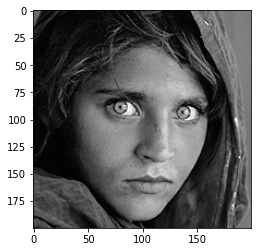

In [3]:
# Implement the Gaussian filter

import numpy as np
import cv2
import matplotlib.pyplot as plt

# Import image
img = cv2.imread('Graphics/face_conv.png')

img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(img, cmap='gray')

In [4]:
# Gaussian filter for noise reduction
gaussian_filter = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]],dtype=np.float32) / 16

Text(0.5, 1.0, 'Gaussian Filter')

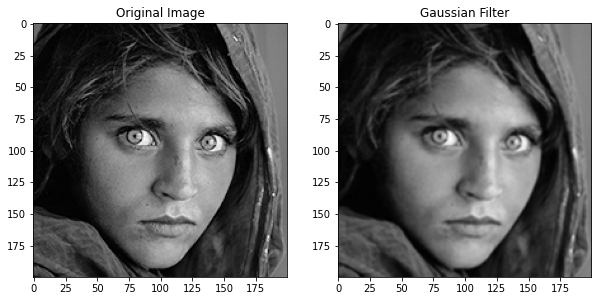

In [20]:
imgGaus = cv2.filter2D(img,-1, gaussian_filter)

# Plot size
fig = plt.figure(figsize = (10,10))

# Create subplots for each image
# Left Image
fig.add_subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

# Right Image
fig.add_subplot(1, 2, 2)
plt.imshow(imgGaus, cmap='gray')
plt.title('Gaussian Filter')

### 3x3 Prewitt Operator

The Prewitt operator is a simple image processing filter used for detecting edges in an image. It works by computing the gradient of the image intensity at each pixel, which represents the rate of change of the image intensity in the horizontal and vertical directions.

The Prewitt operator consists of two separate 3x3 matrices: one for computing the horizontal gradient and one for computing the vertical gradient. These matrices contain values that represent the relative weight or importance of neighboring pixels in the gradient calculation.

To apply the Prewitt operator to an image, the horizontal and vertical gradients are computed separately using the two matrices, and then combined to produce the final gradient magnitude image. The resulting image highlights the edges in the original image, with brighter pixels corresponding to stronger edges.

In simpler terms, the Prewitt operator is a filter that can be used to find edges in an image by looking for areas of rapid change in intensity. It does this by calculating the rate of change of intensity in the horizontal and vertical directions using two 3x3 matrices, and then combining these values to create a final edge detection image.

***Vertical Filter***
$$\begin{bmatrix} -1 & 0 & 1 \\ -1 & 0 & 1 \\ -1 & 0 & 1 \end{bmatrix}$$ 

***Horizontal Filter***
$$\begin{bmatrix} -1 & -1 & -1 \\ 0 & 0 & 0 \\ 1 & 1 & 1 \end{bmatrix}$$ 


In [6]:
kernelX = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernelY = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
imgPrewittX = cv2.filter2D(img, -1, kernelX)
imgPrewittY = cv2.filter2D(img, -1, kernelY)

Text(0.5, 1.0, 'Prewitt Y Edge Detection')

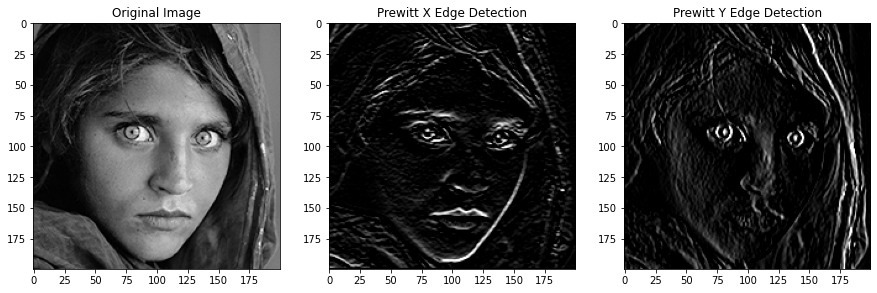

In [19]:
# Plot size
fig = plt.figure(figsize = (15,15))

# Create subplots for each image
# Left Image
fig.add_subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

# Center Image
fig.add_subplot(1, 3, 2)
plt.imshow(imgPrewittX, cmap='gray')
plt.title('Prewitt X Edge Detection')

# Right Image
fig.add_subplot(1, 3, 3)
plt.imshow(imgPrewittY, cmap='gray')
plt.title('Prewitt Y Edge Detection')


Text(0.5, 1.0, 'Prewitt Edge Detection')

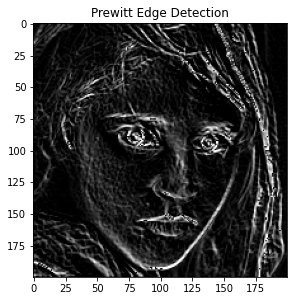

In [22]:
# Plot size
fig = plt.figure(figsize = (10,10))

# Create subplots for each image
# Left Image
fig.add_subplot(1, 2, 1)
plt.imshow(img, cmap='gray')


Prewitt = cv2.add(imgPrewittX, imgPrewittY)
NumpyPrewitt = imgPrewittX + imgPrewittY

plt.imshow(NumpyPrewitt, cmap='gray')
plt.title('Prewitt Edge Detection')

### Sobel Operator
The Sobel operator is another image processing filter used for detecting edges in an image. Like the Prewitt operator, it works by computing the gradient of the image intensity at each pixel. However, the Sobel operator uses a slightly different 3x3 kernel matrix that can provide slightly better edge detection results.

The Sobel operator also consists of two separate 3x3 matrices: one for computing the horizontal gradient and one for computing the vertical gradient. These matrices contain values that represent the relative weight or importance of neighboring pixels in the gradient calculation, similar to the Prewitt operator.

To apply the Sobel operator to an image, the horizontal and vertical gradients are computed separately using the two matrices, and then combined to produce the final gradient magnitude image. As with the Prewitt operator, the resulting image highlights the edges in the original image, with brighter pixels corresponding to stronger edges.

Here are the 3x3 kernel matrices for the Sobel operator:

 ***Vertical Filter***
$$\begin{bmatrix} -1 & 0 & 1 \\ -2 & 0 & 2 \\ -1 & 0 & 1 \end{bmatrix}$$ 

***Horizontal Filter***
$$\begin{bmatrix} -1 & -2 & -1 \\ 0 & 0 & 0 \\ 1 & 2 & 1 \end{bmatrix}$$ 

As you can see, the Sobel operator kernel matrix is similar to the Prewitt operator kernel matrix, but with slightly different weights that can lead to improved edge detection results. The weights in the center row of the Sobel operator kernel matrix are twice the weights in the top and bottom rows, similar to the Prewitt operator, but the Sobel operator also gives more weight to the pixels in the central column of the kernel. This helps to emphasize edges that are more vertical or horizontal, and can lead to better detection of diagonal edges as well.

The Sobel Operator is mainly used in a pipeline that includes noise reduction, a magnitude calcualtion, and thresholding.

$$G = \sqrt{G_{2x} + G_{2y}}$$



### Sobel Pipeline with Noise Reduction

<ol>
<li>Grayscale conversion: The input image is first converted into a grayscale image to simplify the processing.</li>

<li>Noise reduction: Various techniques can be used to reduce noise in the image, such as Gaussian blur, median filtering, or bilateral filtering. These techniques help to smooth out the image and reduce the impact of noise on the edge detection process.</li>

<li>Horizontal and vertical Sobel filtering: The Sobel operator is applied to the noise-reduced grayscale image in both the horizontal and vertical directions. The Sobel operator is a small 3x3 matrix that is convolved with the image. The result of this convolution highlights edges in the image.</li>

<li>Magnitude calculation: The horizontal and vertical edge maps are combined to obtain a single edge map. This is done by calculating the magnitude of the gradient at each pixel. The magnitude is computed using the Pythagorean theorem, which involves taking the square root of the sum of the squares of the horizontal and vertical gradients.<br>
</li>

<li>Thresholding: Finally, a threshold is applied to the edge map to produce a binary image, where the edges are represented by white pixels and the non-edges are represented by black pixels. This threshold is usually set to a value that separates the edges from the non-edges based on the magnitude of the gradient.</li>

</ol>

Text(0.5, 1.0, 'Sobel Edge Detection')

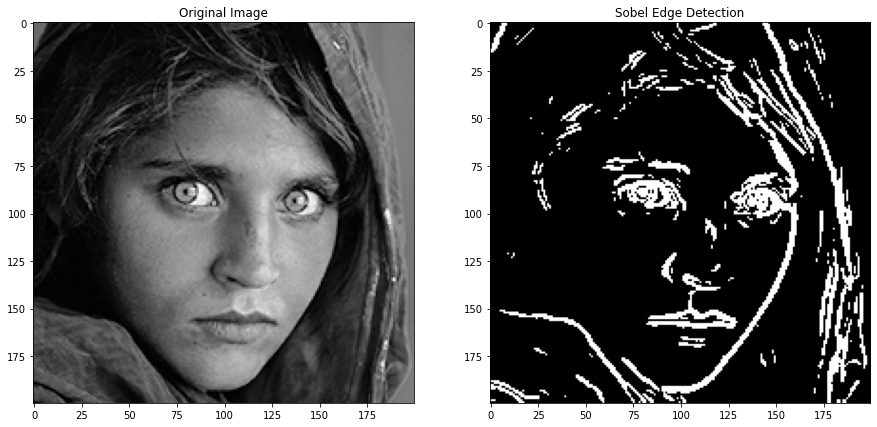

In [31]:

# Convert the image to grayscale
# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise
blur = cv2.GaussianBlur(img, (3, 3), 0)

# Apply Sobel filter to get the horizontal and vertical edges
sobelx = cv2.Sobel(blur, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(blur, cv2.CV_64F, 0, 1, ksize=3)

# Compute the magnitude of the gradients
mag = cv2.magnitude(sobelx, sobely)

# Apply thresholding to get a binary image.  Returns two values, 
# the threshold value and the thresholded image.
val,thresh = cv2.threshold(mag, 120, 255, cv2.THRESH_BINARY)

# Display the original image and the resulting edge map using Matplotlib
# Plot size
fig = plt.figure(figsize = (15,15))

# Create subplots for each image
# Left Image
fig.add_subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

# Right Image
fig.add_subplot(1, 2, 2)
plt.imshow(thresh, cmap='gray')
plt.title('Sobel Edge Detection')

Text(0.5, 1.0, 'Filter2D Edge Detection')

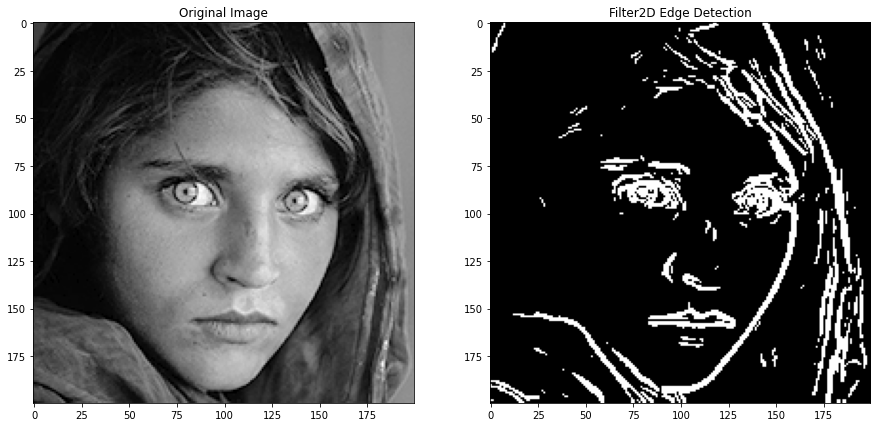

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Import image
img = cv2.imread('Graphics/face_conv.png')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise
blur = cv2.GaussianBlur(gray, (3, 3), 0)

# Define the Sobel kernel for horizontal and vertical edges
sobel_kernel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=np.float64)
sobel_kernel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], dtype=np.float64)

# Apply filter2D to get the horizontal and vertical edges
sobelx = cv2.filter2D(blur, cv2.CV_64F, sobel_kernel_x)
sobely = cv2.filter2D(blur, cv2.CV_64F, sobel_kernel_y)

# Make sure that sobelx and sobely have the same size and type
# sobelx = sobelx.astype(np.float64)
# sobely = sobely.astype(np.float64)

# Compute the magnitude of the gradients
mag = cv2.magnitude(sobelx, sobely)

# Apply thresholding to get a binary image.  Returns two values, 
# the threshold value and the thresholded image.
val, thresh = cv2.threshold(mag, 120, 255, cv2.THRESH_BINARY)

# Display the original image and the resulting edge map using Matplotlib
# Plot size
fig = plt.figure(figsize = (15,15))

# Create subplots for each image
# Left Image
fig.add_subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

# Right Image
fig.add_subplot(1, 2, 2)
plt.imshow(thresh, cmap='gray')
plt.title('Filter2D Edge Detection')

